In [29]:
import pandas  as pd 

In [30]:
df= pd.read_csv('netflix_titles.csv')

In [31]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [32]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [33]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [34]:
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#### it make more sense to drop rows with null values in ex) director and to fill the ones with smaller %


In [35]:
ddrop=df.drop(df[df.director.isnull()].index)
ddrop.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [36]:
df.drop(df.loc[df.director.isnull()].index, inplace = True)

In [37]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [38]:
df.drop(df.loc[df.cast.isnull()].index, inplace = True)

In [39]:
df.drop(df.loc[df.country.isnull()].index, inplace = True)

In [40]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64

#### it won't affect the data to replace the rating and duration with values 

In [41]:
#rating is a nun numeric value so we use the mode()
mode = ''.join(df.rating.mode())
df.fillna({'rating':mode}, inplace = True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [42]:
# duration ca be filled with mean or median or a backward/ forward value
df.duration.ffill(inplace= True)

/tmp/ipykernel_5361/3452471912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.duration.ffill(inplace= True)


In [43]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [44]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### now the dataframe has no missing values :)

In [45]:
# now fix the indexing 
df.reset_index(drop=True, inplace=True)

#### `drop=True` → throws away the old index instead of adding it as a column.

In [46]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5331,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5332,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5333,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5334,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [47]:
df.duration

0         125 min
1       9 Seasons
2         104 min
3         127 min
4         166 min
          ...    
5331       96 min
5332      158 min
5333       88 min
5334       88 min
5335      111 min
Name: duration, Length: 5336, dtype: object

In [48]:
df_movies = df[df.type == 'Movie']
df_movies.duration

0       125 min
2       104 min
3       127 min
4       166 min
5       103 min
         ...   
5331     96 min
5332    158 min
5333     88 min
5334     88 min
5335    111 min
Name: duration, Length: 5189, dtype: object

we ony need the numerical part of the duration

In [49]:
df_movies.duration.str.split()

0       [125, min]
2       [104, min]
3       [127, min]
4       [166, min]
5       [103, min]
           ...    
5331     [96, min]
5332    [158, min]
5333     [88, min]
5334     [88, min]
5335    [111, min]
Name: duration, Length: 5189, dtype: object

In [50]:
df_movies.duration.str.split(expand= True)

,0,1
0,125,min
2,104,min
3,127,min
4,166,min
5,103,min
...,...,...
5331,96,min
5332,158,min
5333,88,min
5334,88,min


In [51]:
df_movies['minutes'] = df_movies.duration.str.split(expand= True)[0].astype(int)
df_movies

/tmp/ipykernel_5361/2912092453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['minutes'] = df_movies.duration.str.split(expand= True)[0].astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
5,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
5332,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
5333,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
5334,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [52]:
df_movies.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minutes          int64
dtype: object

In [53]:
# df_movies.date_added.str.split(',',expand=True)[1]
df_movies.date_added.str.extract(r'(\d{4})') # both does the same thing

,0
0,2021
2,2021
3,2021
4,2021
5,2021
...,...
5331,2016
5332,2019
5333,2019
5334,2020


# identifing outliers

<Axes: ylabel='Frequency'>

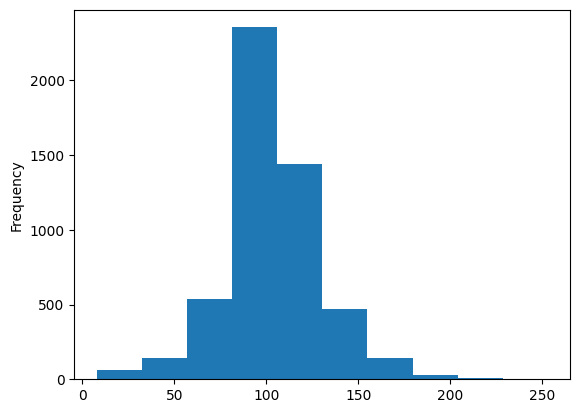

In [54]:
df_movies['minutes'].plot(kind = 'hist', bins= 10)

In [55]:
df_movies['minutes'].value_counts(bins=10).sort_index()

(7.754, 32.5]       61
(32.5, 57.0]       155
(57.0, 81.5]       530
(81.5, 106.0]     2454
(106.0, 130.5]    1343
(130.5, 155.0]     479
(155.0, 179.5]     130
(179.5, 204.0]      27
(204.0, 228.5]       7
(228.5, 253.0]       3
Name: count, dtype: int64

## removing outliers


In [57]:
df_NOToutlier = ((df_movies['minutes'] > 32.5) & ( df_movies['minutes'] < 204.0) )
df_movies[df_NOToutlier]['minutes'].value_counts(bins=10).sort_index()

(32.829, 50.0]      75
(50.0, 67.0]       250
(67.0, 84.0]       505
(84.0, 101.0]     1808
(101.0, 118.0]    1313
(118.0, 135.0]     694
(135.0, 152.0]     283
(152.0, 169.0]     130
(169.0, 186.0]      45
(186.0, 203.0]      15
Name: count, dtype: int64

## removing outliers  
### using box plot 

<Axes: >

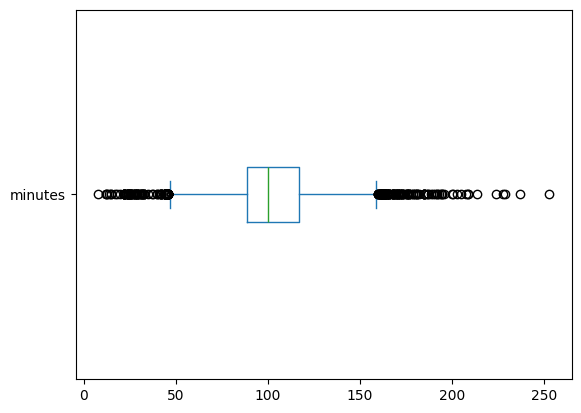

In [58]:
df_movies['minutes'].plot(kind = 'box' ,vert = False )

In [59]:
df_movies['minutes'].describe()


count    5189.000000
mean      102.688572
std        25.962842
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: minutes, dtype: float64

In [60]:
# calculate upper and lower whiskers 
# upper whisker :  Q3 + 1.5* IQR[(Q3 - Q1)]
upper_whisker= 117.0 + (1.5 * (117.0 - 89.0) )
# lower whisker :  Q1 - 1.5* IQR 
lower_whisker= 89.0 - (1.5 * (117.0 - 89.0) )
print(upper_whisker)
print(lower_whisker)

159.0
47.0


### now remove what's outsize tht range

In [61]:
outliers = ((df_movies['minutes'] < 47.0) | (df_movies['minutes'] > 159.0))
df_movies[~outliers]['minutes'].value_counts(bins=10).sort_index()

(46.887, 58.2]     115
(58.2, 69.4]       189
(69.4, 80.6]       275
(80.6, 91.8]       858
(91.8, 103.0]     1361
(103.0, 114.2]     846
(114.2, 125.4]     583
(125.4, 136.6]     386
(136.6, 147.8]     192
(147.8, 159.0]     135
Name: count, dtype: int64

#### now this looks way better in terms of distributions 

# we use bar plot to identify outliers in catigorical data

<Axes: xlabel='rating'>

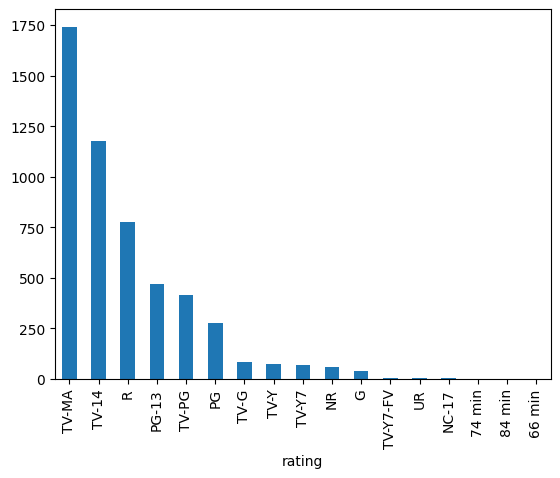

In [62]:
df_movies['rating'].value_counts().plot(kind = 'bar')

In [63]:
df_movies['rating'].value_counts()

rating
TV-MA       1742
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

### we can see that the last three are not even visable 7 it can miss up the prediction so it's better to just remove them 

In [64]:
rating_outliers= ['NC-17' ,'74 min' ,'84 min','66 min']
df_movies[~df_movies['rating'].isin(rating_outliers)]['rating'].value_counts()

rating
TV-MA       1742
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
Name: count, dtype: int64

## Dealing with incosisiance in data 

#### removing white spaces  
`df.col.str.lstrip()`  removes white spaces on the left only  
`df.col.str.rstrip()`  removes white spaces on the right only  
`df.col.str.strip()`  removes only all `additonl` white spaces on the left and right


In [71]:
df_movies.title.title= df_movies.title.str.strip()
# as you can see it didn't remove spaces between words just additional white spaces at the left and right
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
5,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
5332,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
5333,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
5334,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [73]:
# we can also use apply()
df_movies.title.apply(lambda x: x.lower().replace(' ','_'))

0            sankofa
2       the_starling
3       je_suis_karl
4              jeans
5          grown_ups
            ...     
5331         zinzana
5332          zodiac
5333      zombieland
5334            zoom
5335          zubaan
Name: title, Length: 5189, dtype: object

In [90]:
# remove pancituation using regex 
df_movies.title.replace(r'[^\w\s]','', regex= True)  

0            Sankofa
2       The Starling
3       Je Suis Karl
4              Jeans
5          Grown Ups
            ...     
5331         Zinzana
5332          Zodiac
5333      Zombieland
5334            Zoom
5335          Zubaan
Name: title, Length: 5189, dtype: object

### when replacing numbers in strings use `.replace()` instead of `.str.replace()`

In [92]:
# remove only panctuationremove punctuatuation using re.sub()
import re
df_movies.title.apply(lambda x: re.sub(r'[^\w\s]' , '' , x))

0            Sankofa
2       The Starling
3       Je Suis Karl
4              Jeans
5          Grown Ups
            ...     
5331         Zinzana
5332          Zodiac
5333      Zombieland
5334            Zoom
5335          Zubaan
Name: title, Length: 5189, dtype: object